In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# To preprocess the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
# import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
#for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor

#metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score

# ignore warnings   
import warnings
warnings.filterwarnings('ignore')


In [120]:
df = pd.read_csv("heart.csv")
print('Shape of the data is ', df.shape)

Shape of the data is  (1025, 14)


In [121]:
df.head

<bound method NDFrame.head of       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2  

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [123]:
df.shape

(1025, 14)

In [124]:
df['age'].min(), df['age'].max()

(29, 77)

In [125]:
df['age'].describe()

count    1025.000000
mean       54.434146
std         9.072290
min        29.000000
25%        48.000000
50%        56.000000
75%        61.000000
max        77.000000
Name: age, dtype: float64

In [126]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


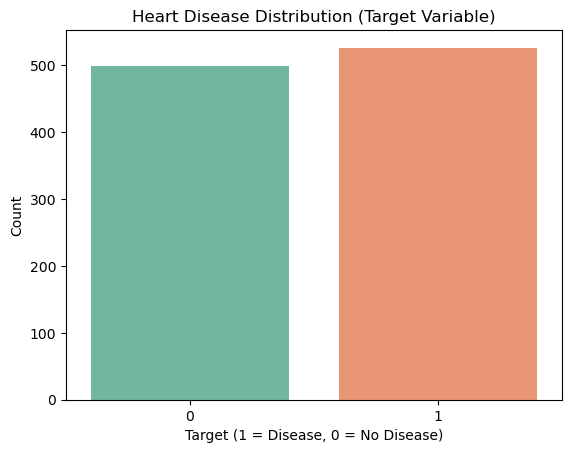

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='target', data=df, palette='Set2')
plt.title('Heart Disease Distribution (Target Variable)')
plt.xlabel('Target (1 = Disease, 0 = No Disease)')
plt.ylabel('Count')
plt.show()

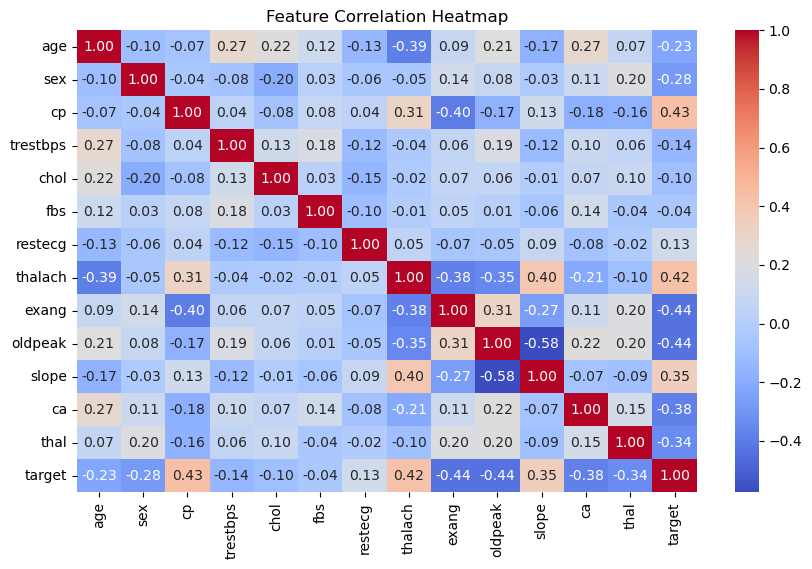

In [128]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

<Axes: xlabel='age', ylabel='Count'>

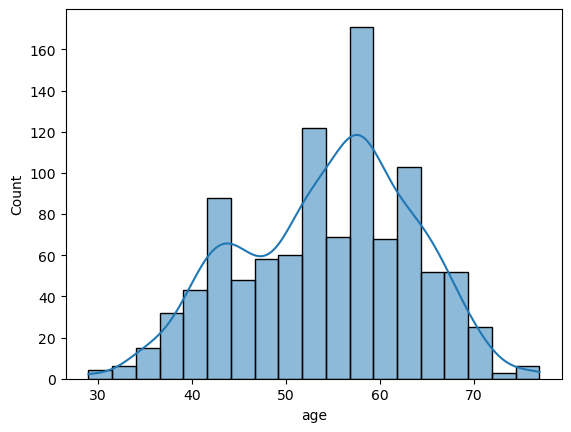

In [129]:
sns.histplot(df['age'], kde=True)

Mean: 54.43414634146342
Median: 56.0
Mode: 58


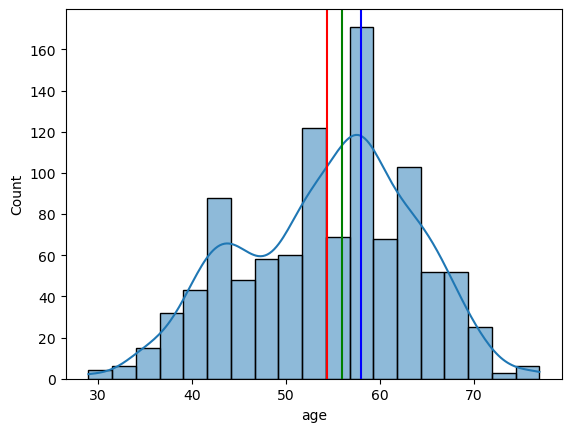

In [130]:
sns.histplot(df['age'], kde=True)
plt.axvline(df['age'].mean(), color='red')
plt.axvline(df['age'].median(), color='green')
plt.axvline(df['age'].mode()[0], color='blue')

# print the value of mean, median and mode of age column
print('Mean:', df['age'].mean())
print('Median:', df['age'].median())
print('Mode:', df['age'].mode()[0])

In [131]:
import plotly.express as px

fig = px.histogram(data_frame=df, x='age', color='sex')
fig.show()


In [132]:
df['sex'].value_counts()

sex
1    713
0    312
Name: count, dtype: int64

In [133]:
male_count = 713
female_count = 312
total_count = male_count + female_count

# calculate percentages
male_percentage = (male_count / total_count) * 100
female_percentage = (female_count / total_count) * 100

# display the results
print(f"Male percentage in the data: {male_percentage:.2f}%")
print(f"Female Percentage in the data: {female_percentage:.2f}%")

# difference
difference_percentage = ((male_count - female_count) / female_count) * 100
print(f"Males are {difference_percentage:.2f}% more than females in the data.")

Male percentage in the data: 69.56%
Female Percentage in the data: 30.44%
Males are 128.53% more than females in the data.


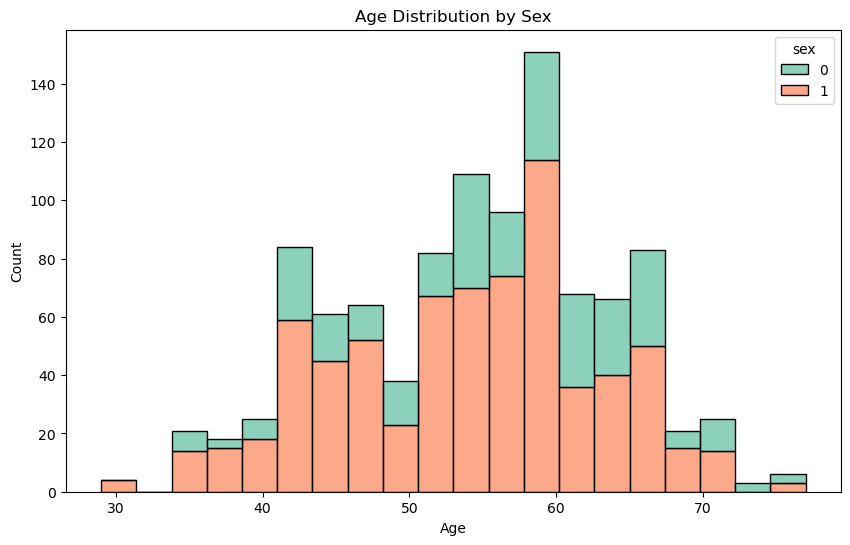

In [134]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='age', hue='sex', multiple='stack', bins=20, palette='Set2')
plt.title('Age Distribution by Sex')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [135]:
df.groupby('sex')['age'].value_counts()

sex  age
0    62     24
     58     21
     63     17
     54     15
     55     15
            ..
1    69      6
     29      4
     34      3
     37      3
     77      3
Name: count, Length: 73, dtype: int64

In [136]:
# find the unique values in dataset column
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [137]:
for col in df.columns:
    unique_vals = df[col].unique()
    print(f"{col} → {unique_vals}")

age → [52 53 70 61 62 58 55 46 54 71 43 34 51 50 60 67 45 63 42 44 56 57 59 64
 65 41 66 38 49 48 29 37 47 68 76 40 39 77 69 35 74]
sex → [1 0]
cp → [0 1 2 3]
trestbps → [125 140 145 148 138 100 114 160 120 122 112 132 118 128 124 106 104 135
 130 136 180 129 150 178 146 117 152 154 170 134 174 144 108 123 110 142
 126 192 115  94 200 165 102 105 155 172 164 156 101]
chol → [212 203 174 294 248 318 289 249 286 149 341 210 298 204 308 266 244 211
 185 223 208 252 209 307 233 319 256 327 169 131 269 196 231 213 271 263
 229 360 258 330 342 226 228 278 230 283 241 175 188 217 193 245 232 299
 288 197 315 215 164 326 207 177 257 255 187 201 220 268 267 236 303 282
 126 309 186 275 281 206 335 218 254 295 417 260 240 302 192 225 325 235
 274 234 182 167 172 321 300 199 564 157 304 222 184 354 160 247 239 246
 409 293 180 250 221 200 227 243 311 261 242 205 306 219 353 198 394 183
 237 224 265 313 340 259 270 216 264 276 322 214 273 253 176 284 305 168
 407 290 277 262 195 166 178 141]
fbs →

In [138]:
for col in df.columns:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())


Value counts for age:
age
58    68
57    57
54    53
59    46
52    43
51    39
56    39
62    37
60    37
44    36
64    34
41    32
63    32
67    31
61    31
55    30
65    27
43    26
42    26
53    26
66    25
45    25
48    23
46    23
50    21
47    18
49    17
35    15
39    14
70    14
68    12
38    12
71    11
40    11
69     9
37     6
34     6
29     4
76     3
77     3
74     3
Name: count, dtype: int64

Value counts for sex:
sex
1    713
0    312
Name: count, dtype: int64

Value counts for cp:
cp
0    497
2    284
1    167
3     77
Name: count, dtype: int64

Value counts for trestbps:
trestbps
120    128
130    123
140    107
110     64
150     55
138     45
128     39
125     38
160     36
112     30
132     28
118     24
108     21
124     20
135     20
145     17
134     17
152     17
170     15
122     14
100     14
136     11
126     10
180     10
142      9
115      9
105      9
146      8
148      7
178      7
94       7
144      6
102      6
154      4
117      

In [139]:
import plotly.express as px

# Example: grouped countplot for 'cp' by 'sex'
fig = px.histogram(
    df,
    x="cp",          # change 'cp' to your column of interest
    color="sex",     # hue-like effect
    barmode="group"  # group bars side-by-side
)

fig.show()

In [140]:


# Histogram of age grouped by target
fig = px.histogram(data_frame=df, x='age', color='target', barmode='overlay')
fig.show()


print("Mean of Age grouped by Target:")
print(df.groupby('target')['age'].mean())
print("-------------------------------------")

print("Median of Age grouped by Target:")
print(df.groupby('target')['age'].median())
print("-------------------------------------")

print("Mode of Age grouped by Target:")
print(df.groupby('target')['age'].agg(pd.Series.mode))
print("-------------------------------------")

Mean of Age grouped by Target:
target
0    56.569138
1    52.408745
Name: age, dtype: float64
-------------------------------------
Median of Age grouped by Target:
target
0    58.0
1    52.0
Name: age, dtype: float64
-------------------------------------
Mode of Age grouped by Target:
target
0    58
1    54
Name: age, dtype: int64
-------------------------------------


<Axes: xlabel='cp', ylabel='count'>

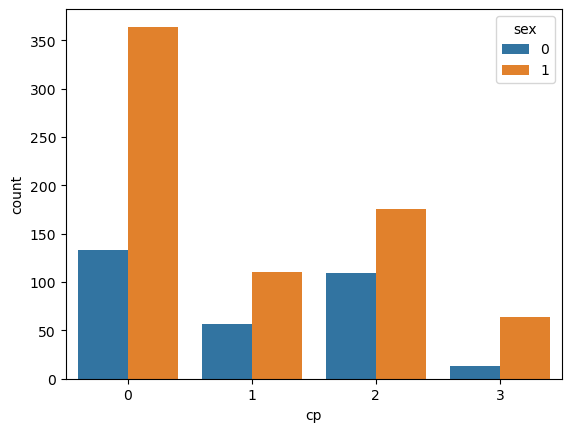

In [141]:
# count plot of cp column by sex column
sns.countplot(df, x='cp', hue='sex')

In [142]:
# draw the plot of age column grouped by cp column using plotly
fig = px.histogram(data_frame=df, x='age', color='cp')
fig.show()

In [143]:
# find the value counts of trestbps column
df['trestbps'].describe()

count    1025.000000
mean      131.611707
std        17.516718
min        94.000000
25%       120.000000
50%       130.000000
75%       140.000000
max       200.000000
Name: trestbps, dtype: float64

<Axes: xlabel='trestbps', ylabel='Count'>

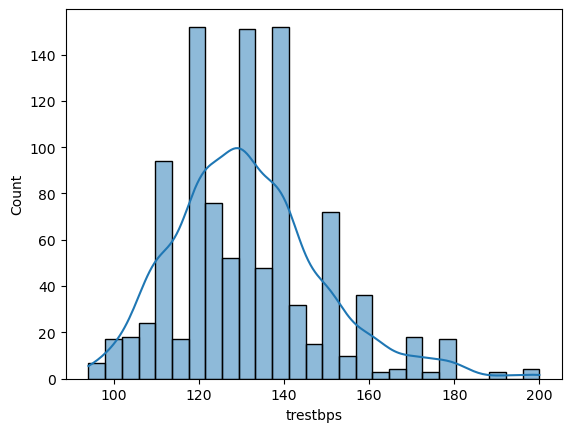

In [144]:
# create a histplot of trestbps column
sns.histplot(df['trestbps'], kde=True)

In [145]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
missing_data_cols

[]

In [146]:
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg', 'fbs', 'cp', 'sex', 'target']
bool_cols = ['fbs', 'exang']
numeric_cols = ['oldpeak', 'thalach', 'chol', 'trestbps', 'age']

In [147]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

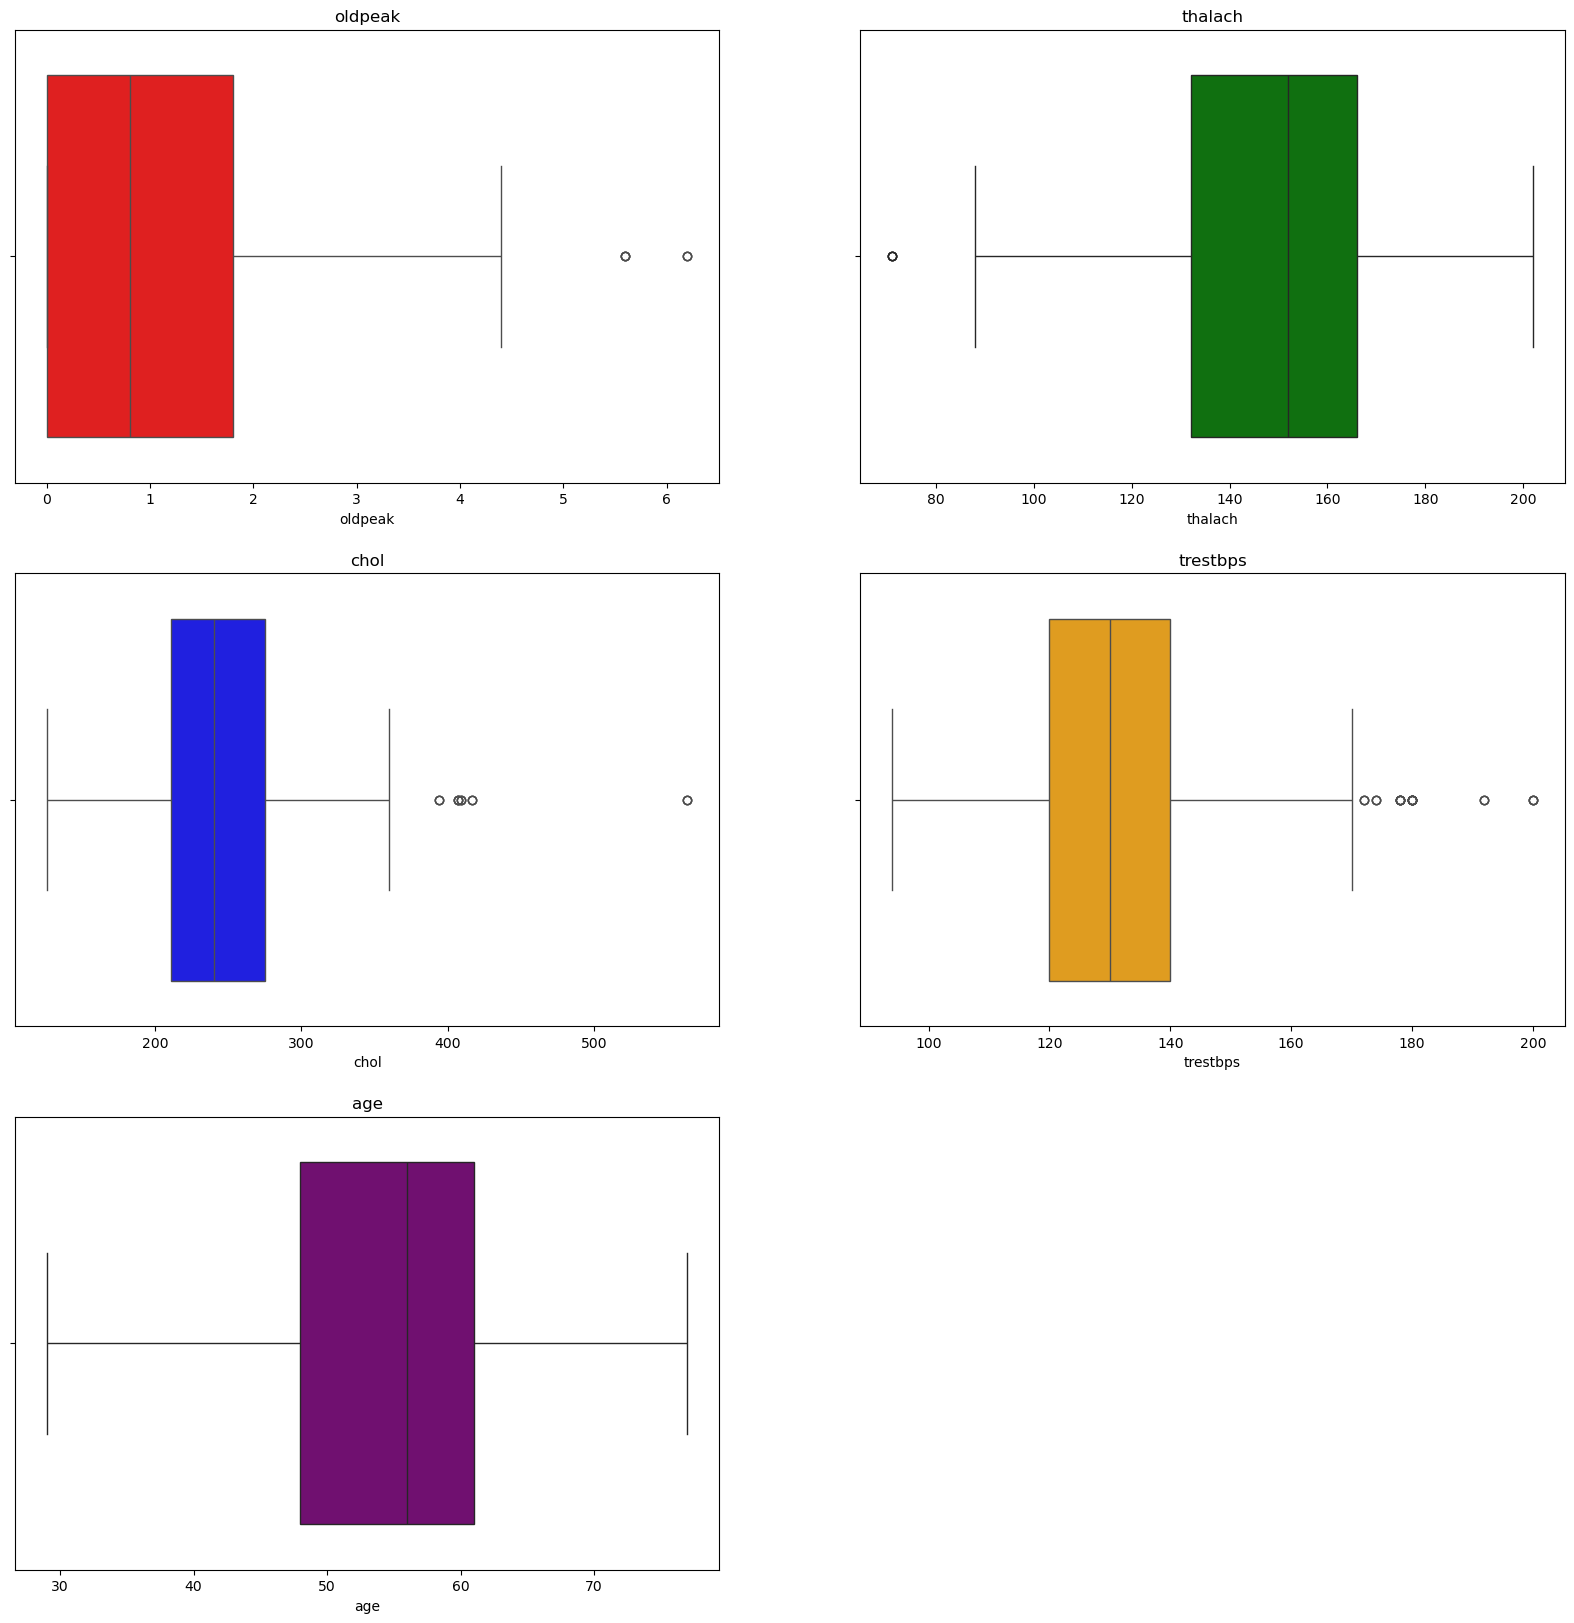

In [148]:

plt.figure(figsize=(20, 20))

colors = ['red', 'green', 'blue', 'orange', 'purple']

for i, col in enumerate(numeric_cols):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=df[col], color=colors[i])
    plt.title(col)
plt.show()

In [149]:
import plotly.express as px

for col in numeric_cols:
    fig = px.box(df, y=col, title=f"Box Plot of {col}")
    fig.show()

In [150]:
# print the row from df where trestbps value is 0
df[df['trestbps'] == 0]
# remove this row from data
df = df[df['trestbps'] != 0]

In [151]:
df.head

<bound method NDFrame.head of       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2  

In [152]:
df['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [153]:
# Separate independent (X) and dependent (y) variables
X = df.drop('target', axis=1)  
y = df['target']               

print("Independent variables (X):")
print(X.head())
print("\nDependent variable (y):")
print(y.head())



Independent variables (X):
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  
0   2     3  
1   0     3  
2   0     3  
3   1     3  
4   3     2  

Dependent variable (y):
0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64


In [154]:
X.shape

(1025, 13)

In [155]:
y.shape

(1025,)

In [158]:
# Save new_df as a CSV file
X.to_csv('X.csv', index=False)

print("CSV file saved successfully!")

CSV file saved successfully!


In [157]:
# Save new_df as a CSV file
y.to_csv('y.csv', index=False)

print("CSV file saved successfully!")

CSV file saved successfully!
